## APPLICATION1: Solving a Simple ODE with Python

In this example, we solve a **first-order Ordinary Differential Equation (ODE)** numerically and compare it with its exact analytical solution.

---

### The ODE

$$
\frac{dy}{dt} = -2y,\quad y(0) = 1
$$

---

### Exact Solution

The analytical solution for this ODE is:

$$
y(t) = e^{-2t}
$$

---

### Numerical Solution

We solve it numerically using **`scipy.integrate.solve_ivp`**.  
We compare the numerical result with the exact solution by plotting both using different markers:

- **Circles (o)** → Numerical solution (`solve_ivp`)  
- **Crosses (x)** → Exact analytical solution

---

### Visualization

The scatter plot below shows how the numerical solution matches the exact solution.

---

**This demonstrates how Python can easily solve ODEs and compare them to exact results!**


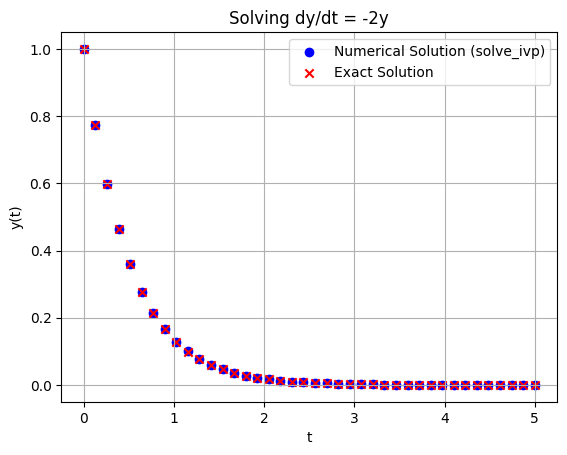

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE as a Python function
def dydt(t, y):
    return -2 * y

# Initial condition
y0 = [1]

# Time span for the solution
t_span = (0, 5)  # From t=0 to t=5

NUMBER_OF_POINTS = 40 # NOTE change this to show more points 
# Solve the ODE
solution = solve_ivp(dydt, t_span, y0, t_eval=np.linspace(0, 5, NUMBER_OF_POINTS))
# print(f"solution:{solution}")

# Exact solution for comparison
t_exact = np.linspace(0, 5, NUMBER_OF_POINTS)
y_exact = np.exp(-2 * t_exact) # This is the exact solution

# Plot the numerical and exact solution with different markers
plt.scatter(solution.t, solution.y[0], marker='o', color='blue', label='Numerical Solution (solve_ivp)')
plt.scatter(t_exact, y_exact, marker='x', color='red', label='Exact Solution')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solving dy/dt = -2y')
plt.legend()
plt.grid()
plt.show()

## APPLICATION2: Cooling of a Hot Object (Newton’s Law of Cooling)

In this example, we model the cooling of a hot cup of coffee left in a room using **Newton’s Law of Cooling**.

---

### The ODE

Newton’s Law of Cooling says:

$$
\frac{dT}{dt} = -k (T - T_{\text{env}})
$$

**Where:**

- $T$ = temperature of the object (coffee)  
- $T_{\text{env}}$ = ambient temperature (room temperature)  
- $k$ = cooling constant (depends on material, airflow, etc.)

---

### Given Parameters

- $T(0) = 90^\circ C$ (initial temperature of the coffee)  
- $T_{\text{env}} = 25^\circ C$ (ambient room temperature)  
- $k = 0.1$ (typical value for simple cooling)

---

### Exact Solution

The exact analytical solution for Newton’s Law of Cooling is:

$$
T(t) = T_{\text{env}} + (T_0 - T_{\text{env}}) e^{-kt}
$$

So for our coffee example:

$$
T(t) = 25 + (90 - 25) \, e^{-0.1 t}
$$

---

### What We Do

- **Numerically solve** the ODE using `scipy.integrate.solve_ivp`.  
- **Compare** it with the exact solution.

---

This shows how a simple ODE models a real-life process like how your coffee cools down to room temperature!


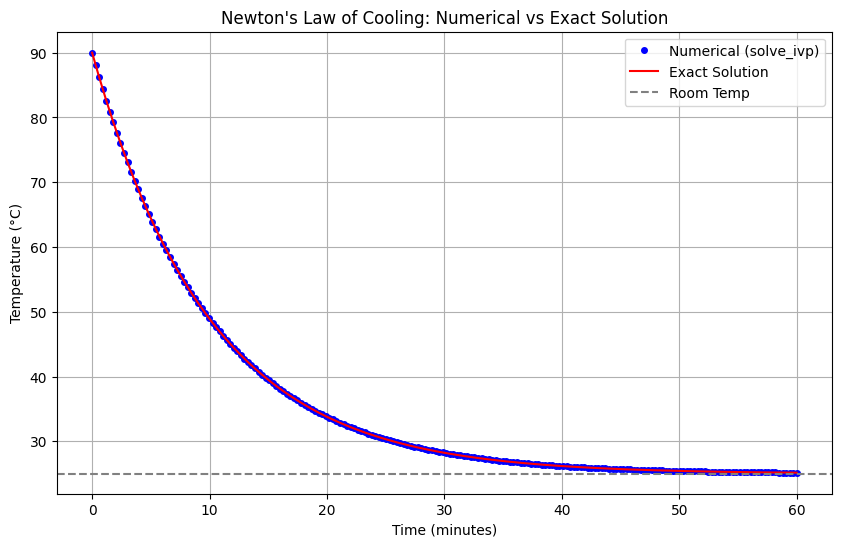

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
k = 0.1            # cooling constant
T_env = 25         # ambient temperature (°C)
T0 = 90            # initial coffee temperature (°C)

# Define the ODE
def dTdt(t, T):
    return -k * (T - T_env)

# Time span: 0 to 60 minutes
t_span = (0, 60)
t_eval = np.linspace(0, 60, 200)

# Solve numerically
sol = solve_ivp(dTdt, t_span, [T0], t_eval=t_eval)

# Exact solution
T_exact = T_env + (T0 - T_env) * np.exp(-k * t_eval)

# Plot both on the same plot
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'bo', markersize=4, label='Numerical (solve_ivp)')
plt.plot(t_eval, T_exact, 'r-', label='Exact Solution')
plt.axhline(T_env, color='gray', linestyle='--', label='Room Temp')

plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title("Newton's Law of Cooling: Numerical vs Exact Solution")
plt.legend()
plt.grid()
plt.show()
